In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [39]:
from PIL import Image

source_path = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set/Heart/heart (1).jpg"
dest_path = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/pic"


image = Image.open(source_path)
image.thumbnail((300,300), Image.ANTIALIAS)
image.save(dest_path, "JPEG")

In [40]:
import cv2

img = cv2.imread("/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/heart (1).jpg")
img2=cv2.resize(img, (500,500))
img2.shape
plt.imshow(img2)

[ WARN:0@5701.334] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/heart (1).jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [59]:
import glob, cv2
inputFolder = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set/Heart"
i=0

for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    resized = cv2.resize(image, (100,100))
    cv2.imwrite("/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/Heart/heart%i.jpg" %i, resized)
    i+=1
    

Premature end of JPEG file


In [60]:
inputFolder = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set/Oblong"
i=0

# list=[img for img in glob.glob(inputFolder + "/*.jpg")]
# print(list)
# print(len(list))
# image=cv2.imread(list[0])
# print(image)
# resized = cv2.resize(image, (200,300))
# plt.imshow(resized)

for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    if image is not None:
        resized = cv2.resize(image, (100,100))
        cv2.imwrite("/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/Oblong/oblong%i.jpg" %i, resized)
    i+=1

In [61]:
inputFolder = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set/Oval"
i=0

for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    resized = cv2.resize(image, (100,100))
    cv2.imwrite("/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/Oval/oval%i.jpg" %i, resized)
    i+=1

In [62]:
inputFolder = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set/Round"
i=0

for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    resized = cv2.resize(image, (100,100))
    cv2.imwrite("/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/Round/round%i.jpg" %i, resized)
    i+=1

In [63]:
inputFolder = "/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set/Square"
i=0

for img in glob.glob(inputFolder + "/*.jpg"):
    image = cv2.imread(img)
    resized = cv2.resize(image, (100,100))
    cv2.imwrite("/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2/Square/square%i.jpg" %i, resized)
    i+=1

Premature end of JPEG file


# Data Loading & Preprocessing:

    1. Loading the dataset and Transform into Tensors:

In [64]:
from torchvision import datasets, transforms
dataset_path=datasets.ImageFolder(root='/Users/tanya.banerjee/Downloads/FaceShape Dataset/training_set_2', transform=transforms.Compose([transforms.ToTensor()]))

    2. Spliting the dataset Into Train and Test:
    
        Spliting the Dataset into 80% training and 20% testing dataset, and shuffling the dataset to distribute the train 
        and test into random examples 
        

In [65]:
from torch.utils.data.sampler import SubsetRandomSampler

split = int(0.8 * len(dataset_path))
index_list = [i for i in range(len(dataset_path))]
np.random.shuffle(index_list)
train_idx, test_idx = index_list[:split], index_list[split:] ## Traing and testing indexes.


## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
## create iterator objects for train and test datasets
train_loader = torch.utils.data.DataLoader(dataset_path, batch_size=256, sampler=tr_sampler)
test_loader = torch.utils.data.DataLoader(dataset_path, batch_size=256, sampler=test_sampler)

print ("Total Number of Examples: ",len(dataset_path))
print ("Number of training Examples: ",len(tr_sampler))
print ("Number of testing Examples: ",len(test_sampler))

Total Number of Examples:  3998
Number of training Examples:  3198
Number of testing Examples:  800


In [66]:
Classes_num=len(train_loader.dataset.classes)
print ('Number of Classes',Classes_num)
print('Classes Name: ', train_loader.dataset.classes)

Number of Classes 5
Classes Name:  ['Heart', 'Oblong', 'Oval', 'Round', 'Square']


Example: 


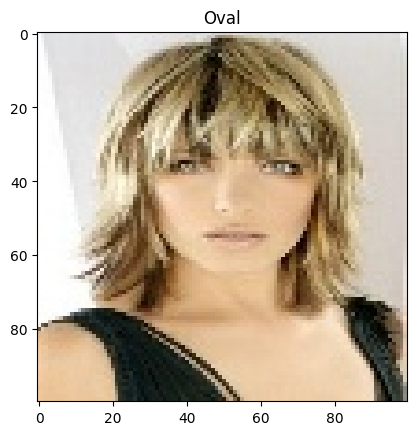

In [67]:
print ('Example: ')
i1, l1 = next(iter(train_loader))
plt.title(train_loader.dataset.classes[l1[0]])
plt.imshow(np.array(i1[0].permute(1, 2, 0)));

In [68]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=9, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=8, kernel_size=7, stride=1, padding=0)
        
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=0)
        
        self.fc1 = nn.Linear(8*8*16, 300)
        self.fc2 = nn.Linear(300, Classes_num)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = x.view(-1, 8*8*16)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

In [69]:
model = Model()
print(model)

Model(
  (conv1): Conv2d(3, 6, kernel_size=(9, 9), stride=(1, 1))
  (conv2): Conv2d(6, 8, kernel_size=(7, 7), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=5, bias=True)
)


In [70]:
import torch.optim as optim
# create a loss function
criterion = nn.CrossEntropyLoss()
# create a stochastic gradient descent optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [71]:
# run the main training loop
loss_array=[]
epochs=30
for epoch in range(1,epochs):
    
    for batch_idx, (data, target) in enumerate(train_loader):
        
        data, target = Variable(data), Variable(target)
        
        #In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch
        optimizer.zero_grad()## accumulates the gradients on subsequent backward passes.
        
        ## 1. forward propagation
        model_out = model(data)
        
        ## 2. loss calculation
        loss = criterion(model_out, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        loss_array.append(loss.item())
        
        if batch_idx % len(train_loader)-1 == 0:
            
            print('Epoch: ',epoch,'Loss: ', loss.item())

Epoch:  1 Loss:  1.60928213596344
Epoch:  2 Loss:  1.6065287590026855
Epoch:  3 Loss:  1.6069221496582031
Epoch:  4 Loss:  1.6016147136688232
Epoch:  5 Loss:  1.5919256210327148
Epoch:  6 Loss:  1.581707239151001
Epoch:  7 Loss:  1.579372763633728
Epoch:  8 Loss:  1.5718505382537842
Epoch:  9 Loss:  1.5463294982910156
Epoch:  10 Loss:  1.557542085647583
Epoch:  11 Loss:  1.4826164245605469
Epoch:  12 Loss:  1.52581787109375
Epoch:  13 Loss:  1.484058141708374
Epoch:  14 Loss:  1.504521131515503
Epoch:  15 Loss:  1.4770559072494507
Epoch:  16 Loss:  1.408543348312378
Epoch:  17 Loss:  1.4783684015274048
Epoch:  18 Loss:  1.4157568216323853
Epoch:  19 Loss:  1.4553070068359375
Epoch:  20 Loss:  1.4109758138656616
Epoch:  21 Loss:  1.4533562660217285
Epoch:  22 Loss:  1.4615988731384277
Epoch:  23 Loss:  1.383739948272705
Epoch:  24 Loss:  1.372558832168579
Epoch:  25 Loss:  1.4462844133377075
Epoch:  26 Loss:  1.4047203063964844
Epoch:  27 Loss:  1.3886642456054688
Epoch:  28 Loss:  1.43

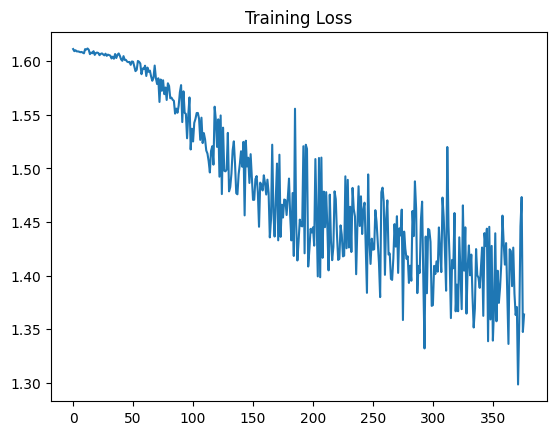

In [72]:
plt.plot(loss_array)
plt.title("Training Loss")
plt.show()

    2. Checking Accuracy of Model

In [74]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = Variable(data), Variable(target)
    
    model_out = model(data)
    # sum up batch loss
    
    test_loss += criterion(model_out, target).item()
    pred = model_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)

print('Average loss: ',test_loss)
print('Accuracy: ',np.array(100. * correct / len(test_sampler)),'%')
print ('Total Test Examples: ',len(test_sampler))
print ('Correct predicted Examples: ',int(correct))


Average loss:  0.0014579997413333742
Accuracy:  38.25 %
Total Test Examples:  800
Correct predicted Examples:  306
